In [2]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# CSV

#Layout
ECI_map = pd.read_csv('P2/umap_layout_hs92 (1).csv')

#Links
ECI_links = pd.read_csv('P2/top_edges_hs92 (1).csv')

#Product Trade Data By country and year
Prod_trade = pd.read_csv('P2/hs92_country_product_year_4.csv', dtype={'product_hs92_code': str},low_memory=False)

#Id to Name
id_name = pd.read_csv('P2/product_hs92.csv')

#Global Trade By product
Global_trade = pd.read_csv('P2/hs92_product_year_4.csv', dtype={'product_hs92_code': str},low_memory=False)

#ECI DATA
ECI = pd.read_csv('P2/growth_proj_eci_rankings.csv')

In [10]:
P_CHL = Prod_trade[(Prod_trade['country_iso3_code']=='CHL') & (Prod_trade['export_rca']>=1)]
years = list(range(2003,2024))
alfa = pd.DataFrame(columns=years, index=range(0,10))

for year in years:
    Data = list(P_CHL[P_CHL['year'] == year]['product_hs92_code'].str[:1])
    for i in range(0,10):
        alfa.loc[i,year] = Data.count(str(i))
alfa = alfa.set_index(id_name[id_name['product_level']==1]['product_name'])
alfa.index.name = 'Industry'
alfa.index = ['Textiles, prendas de vestir, calzado y muebles', 'Vegetales, animales, madera y papel', 'Piedra, vidrio y cerámica', 'Minerales, combustibles, menas y sales', 'Metales', 'Químicos y plásticos',
'Vehículos de transporte', 'Maquinaria e instrumentos', 'Electrónica',
'Otros']
alfa = alfa.T
alfa.index.name = 'Año'



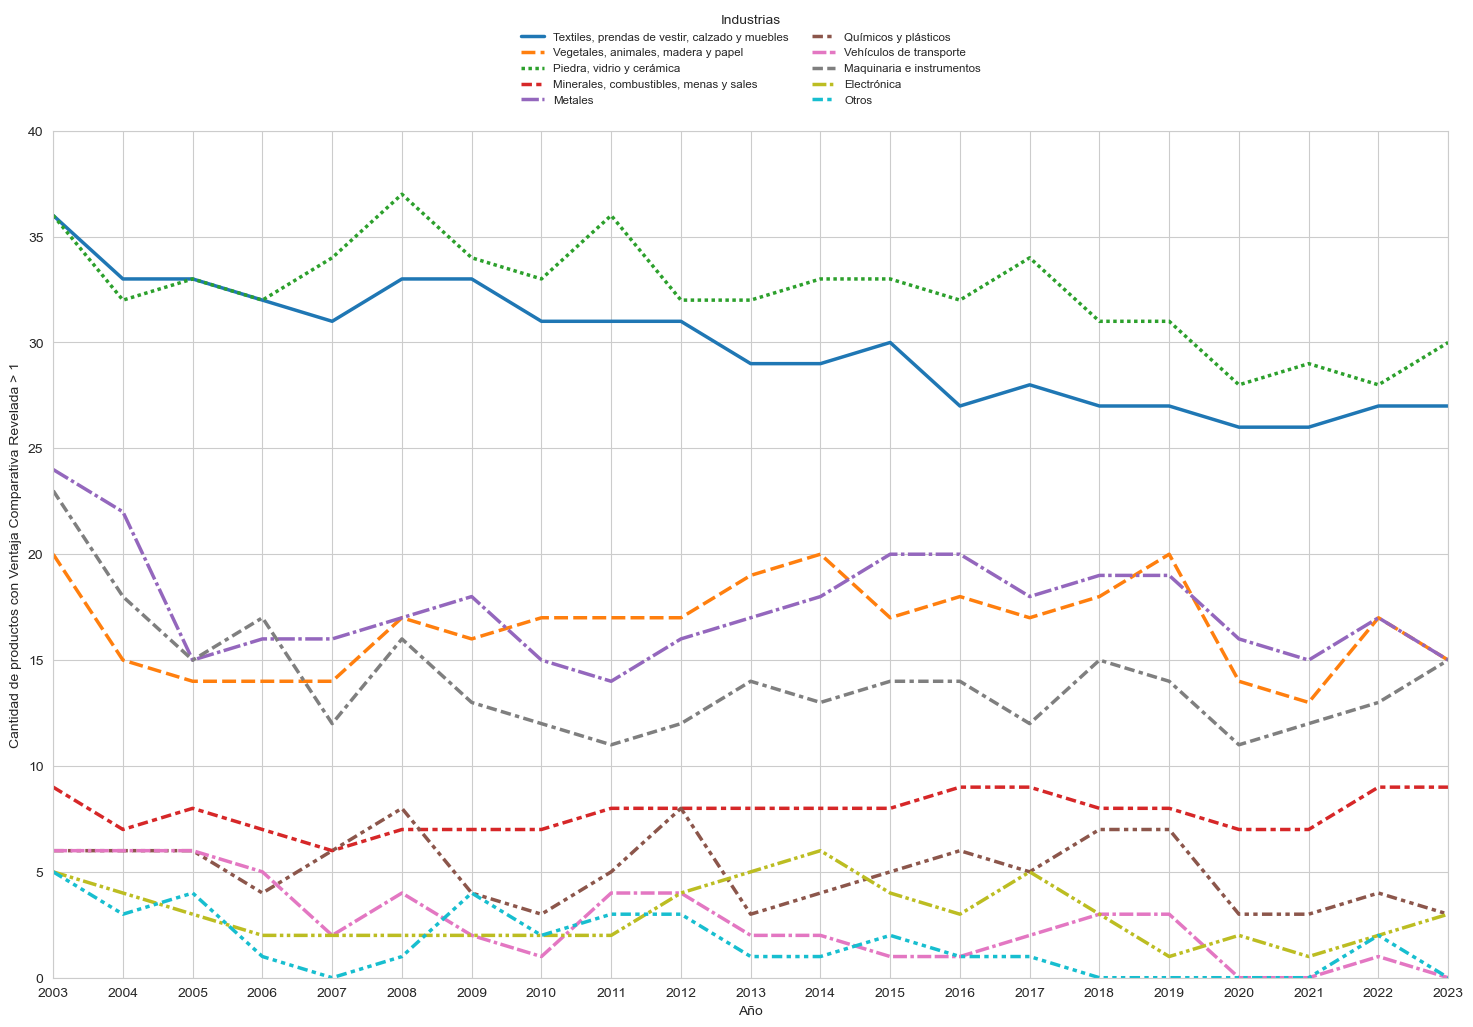

In [12]:
sns.set_style('whitegrid')



fig, ax = plt.subplots(figsize=(18, 11))
plt.xlim(2003,2023)
plt.ylim(0,40)
plt.rcParams['axes.autolimit_mode'] = 'round_numbers' 
plt.xticks(np.arange(2003, 2024, 1))

sns.lineplot(data=alfa ,palette="tab10", linewidth=2.5)
plt.ylabel("Cantidad de productos con Ventaja Comparativa Revelada > 1")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=2, fontsize='small', frameon=False,
           title='Industrias', facecolor='lightgray')

In [3]:
ECI

,country_id,country_iso3_code,year,growth_proj,in_rankings,eci_sitc,eci_rank_sitc,eci_hs92,eci_rank_hs92,eci_hs12,eci_rank_hs12
0,4,AFG,1995,NaN,True,-0.616,153,-0.473,152.0,NaN,NaN
1,4,AFG,1996,NaN,True,-0.838,171,-0.477,144.0,NaN,NaN
2,4,AFG,1997,NaN,True,-0.429,132,0.063,105.0,NaN,NaN
3,4,AFG,1998,NaN,True,-0.426,130,-0.278,129.0,NaN,NaN
4,4,AFG,1999,NaN,True,-0.812,171,-0.249,124.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12748,999,NaN,1986,NaN,NaN,2.234,5,NaN,NaN,NaN,NaN
12749,999,NaN,1990,NaN,NaN,-0.079,103,NaN,NaN,NaN,NaN
12750,999,NaN,1992,NaN,NaN,-0.981,186,NaN,NaN,NaN,NaN
12751,999,NaN,1993,NaN,NaN,-0.477,152,NaN,NaN,NaN,NaN


In [3]:
ECI = ECI.dropna(subset=['country_iso3_code','eci_hs92'])

In [3]:
Prod_trade

,country_id,country_iso3_code,product_id,product_hs92_code,year,export_value,import_value,global_market_share,export_rca,distance,cog,pci
0,4,AFG,650,0101,2001,0,13440,0.000000,0.000000,0.939,0.002,0.032
1,4,AFG,650,0101,2002,8767,1521,0.000006,0.622626,0.934,0.002,-0.008
2,4,AFG,650,0101,2003,0,136545,0.000000,0.000000,0.941,0.002,0.333
3,4,AFG,650,0101,2004,0,49566,0.000000,0.000000,0.938,0.001,0.206
4,4,AFG,650,0101,2005,7220,26130,0.000003,0.166021,0.924,0.001,-0.294
...,...,...,...,...,...,...,...,...,...,...,...,...
6497424,999,ANS,1829,9107,1995,0,5907,0.000000,0.000000,0.997,0.004,0.907
6497425,999,ANS,1853,9401,1999,0,35680,0.000000,0.000000,0.998,0.000,-0.041
6497426,999,ANS,1855,9403,1999,0,48930,0.000000,0.000000,0.998,0.000,-0.166
6497427,999,ANS,1891,9999,1996,0,6182,0.000000,0.000000,0.992,0.001,-0.291


In [27]:
Global_trade

,product_id,product_hs92_code,year,export_value,import_value,pci
0,650,0101,1995,1018155630,1018155630,0.044
1,651,0102,1995,5208104239,5208104239,-0.457
2,652,0103,1995,1586684113,1586684113,0.024
3,653,0104,1995,866772784,866772784,-1.035
4,654,0105,1995,927028221,927028221,-0.168
...,...,...,...,...,...,...
35892,1888,9704,2023,134728248,134728248,-0.177
35893,1889,9705,2023,1911853776,1911853776,-0.417
35894,1890,9706,2023,2532241881,2532241881,-0.594
35895,1891,9999,2023,636003054642,636003054642,0.044


In [4]:
ECI_links['product_hs92_code_source'] = ECI_links['product_hs92_code_source'].astype(str).str.zfill(4)
ECI_links['product_hs92_code_target'] = ECI_links['product_hs92_code_target'].astype(str).str.zfill(4)

In [7]:
ECI_links

,product_hs92_code_source,product_hs92_code_target
0,6110,6104
1,6104,6110
2,6106,6104
3,6104,6106
4,6108,6107
...,...,...
4311,2510,2612
4312,4201,8001
4313,8001,4201
4314,2606,2510


# 1. Filtrar por Productos validos de HS92 a nivel 4. 

## 1.1 FIltro de HS

In [3]:

def winsorize(s, lower_q=0.01, upper_q=0.99):
    
    lo, hi = s.quantile(lower_q), s.quantile(upper_q)
    return s.clip(lower=lo, upper=hi)

def normalize_rank(s):
    
    s = pd.to_numeric(s, errors="coerce")
    r = s.rank(method="average", pct=True)  
    return (r - r.min()) / (r.max() - r.min() + 1e-12)

def normalize_minmax(s: pd.Series) -> pd.Series:

    s = pd.to_numeric(s, errors="coerce")
    mn, mx = s.min(), s.max()
    if not np.isfinite(mn) or not np.isfinite(mx) or mx - mn < 1e-12:
        return pd.Series(0.0, index=s.index)
    return (s - mn) / (mx - mn + 1e-12)

Además considerese que los años de pandemia son inestables, por lo que para seleccionar definitivamente se evalua solo el año 2023 para la seleccion.

Verificar coincidencia en cantidad de HS Products

In [27]:
len(Global_trade['product_hs92_code'].unique())

1243

In [28]:
len(Prod_trade['product_hs92_code'].unique())

1243

In [6]:
less_1M = ['ASM','AND','AIA','ATG','ABW','BHS','BRB','BLZ','BMU','BTN','BES','BRN','CPV','CYM','CXR','CCK','COM','COK','CUW','CYP','DMA','FLK','FRO','FJI','PYF','GIB','GRL','GRD','GGY','GUY','VAT','ISL','IMN','JEY','KIR','LIE','LUX','MAC','MDV','MLT','MHL','FSM','MCO','MNE','NRU','NCL','NIU','NFK','MNP','PLW','PCN','BLM','SHN','KNA','LCA','MAF','SPM','VCT','WSM','SMR','STP','SYC','SXM','SLB','SUR','TKL','TON','TCA','TUV','VGB','VIR','WLF','ESH']

country_valid = list(set(Prod_trade['country_iso3_code']) - set(less_1M))

Prod_trade = Prod_trade[Prod_trade['country_iso3_code'].isin(country_valid)]


In [7]:
def valids(year):
    #Cargo los dfs del año
    df = Prod_trade[Prod_trade['year'] == year]
    HS_df = Global_trade[Global_trade['year'] == year]
    check_df = df.groupby(['country_iso3_code'])['export_value'].sum().reset_index()

    #Separamos paisesvalidos
    iso3_invalids = check_df[check_df['export_value']<1000000000]['country_iso3_code'].unique()
    
    #Separamos HS invalidos
    HS_not_valid = HS_df[HS_df['export_value']<500000000]['product_hs92_code'].unique()

    HS_invalids = set(HS_not_valid)
    HS_valids = set(Prod_trade['product_hs92_code'].unique()) - HS_invalids

    iso3_invalids = set(iso3_invalids)
    iso3_valids = set(Prod_trade['country_iso3_code'].unique()) - iso3_invalids
    Prod_trade_year = df[(df['country_iso3_code'].isin(iso3_valids)) & (df['product_hs92_code'].isin(HS_valids))]
    Global_trade_year = HS_df[HS_df['product_hs92_code'].isin(HS_valids)]

    #Ahora hay que generar el Mcp
    RCA_dic = Prod_trade_year[Prod_trade_year['export_rca']>=1]
    Paises = RCA_dic['country_iso3_code'].unique()
    RCA_dict = {}
    for country in Paises:
        hs_prods = RCA_dic[RCA_dic['country_iso3_code'] == country]['product_hs92_code'].unique().tolist()
        RCA_dict[country] = hs_prods

    RCA_hs = RCA_dic['product_hs92_code'].unique().tolist()
    RCA_hs = sorted(RCA_hs)
    #Matriz Mcp
    data = [[0] * len(RCA_hs) for _ in range(len(Paises))]
    M_cp_year = pd.DataFrame(data, index=Paises, columns=RCA_hs)
    for country in Paises:
        for prod in RCA_hs:
            a = RCA_dict[country]
        
            M_cp_year.loc[country,prod] = int(prod in a)

    PCI = Global_trade_year
    PCI = PCI[['product_hs92_code', 'pci']]
    PCI = PCI[PCI['product_hs92_code'].isin(RCA_hs)]
    PCI

    #Apesar de creer que si 9999 quye son discrepancias equivale a que el pais posee errores si posee un RCA>1 de ello, voy a optar simplemente por dropearlo de los todos los entregables
    #MCP
    M_cp_year = M_cp_year.drop(columns='9999')
    #Prod_trade
    Prod_trade_year = Prod_trade_year[Prod_trade_year['product_hs92_code'].isin(set(Prod_trade_year['product_hs92_code'])-set(['9999','XXXX']))]
    #Global_trade
    Global_trade_year = Global_trade_year[Global_trade_year['product_hs92_code'].isin(set(Global_trade_year['product_hs92_code'])-set(['9999','XXXX']))]
    #PCI
    PCI = PCI[PCI['product_hs92_code'].isin(set(PCI['product_hs92_code'])-set('9999'))]
    #RCA_hs
    RCA_hs.remove('9999')

    #Finalmente eliminamos Aquellos paises sin ECI dicho pais en dicho año
    ECI_year = ECI[ECI['year'] == year]
    aux = set(M_cp_year.index) - set(ECI_year['country_iso3_code'].unique())
    M_cp_year = M_cp_year.drop(index = aux)
    
    return M_cp_year, Prod_trade_year, Global_trade_year, RCA_hs, PCI


In [29]:
M_cp_year, Prod_trade_year, Global_trade_year, RCA_hs, PCI = valids(2023)

In [30]:
M_cp_year

,0101,0102,0103,0104,0105,0106,0201,0202,0203,0204,...,9613,9615,9616,9617,9618,9701,9702,9703,9705,9706
AFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
ALB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DZA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BFA,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
URY,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
UZB,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
VEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Solo correr si desea calcular PHIS

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
def PHI_cons(RCA_hs, M_cp_year):
    
    data = [[float(0)] * len(RCA_hs) for _ in range(len(RCA_hs))]
    PHI = pd.DataFrame(data, index=RCA_hs, columns=RCA_hs)
    Mp = pd.DataFrame(columns=RCA_hs, index=['Sum'])
    for i in RCA_hs:
        Mp.loc['Sum',i] = M_cp_year.loc[:,i].sum()
    
    for p in RCA_hs:
        for q in RCA_hs:
            if p > q:
                df = M_cp_year[[p,q]]
                df['prod'] = M_cp_year[p]*M_cp_year[q]
                suma = df['prod'].sum()

                phi = suma/max(Mp.loc['Sum',p],Mp.loc['Sum',q])
            
                PHI.loc[p,q] = phi
            else:
                None

    
    
            
    return PHI

Hagamos PHIs de cada año y lo scamos formato CSV

In [ ]:
years = list(range(1999,2019))

for year in years:
    M_cp_year, _, _, RCA_hs, _ = valids(year)
    PHI = PHI_cons(RCA_hs, M_cp_year)
    file_name = f'P2/PHI_{year}.csv'
    PHI.to_csv(file_name, index=True)
    print(f'Año {year} listo')

Año 1999 listo
Año 2000 listo
Año 2001 listo
Año 2002 listo
Año 2003 listo
Año 2004 listo
Año 2005 listo
Año 2006 listo
Año 2007 listo
Año 2008 listo
Año 2009 listo
Año 2010 listo
Año 2011 listo
Año 2012 listo
Año 2013 listo
Año 2014 listo
Año 2015 listo
Año 2016 listo
Año 2017 listo
Año 2018 listo


## Importar PHIS

In [8]:
def PHI_import(year):
    file_name = f'P2/PHI_{year}.csv'
    PHI = pd.read_csv(file_name, dtype={0: str})
    PHI = PHI.set_index(PHI['Unnamed: 0'])
    PHI.index.name = None
    PHI = PHI.drop(columns=['Unnamed: 0'])
    matrix = PHI.values
    matriz_sim = matrix + matrix.T
    df_sim = pd.DataFrame(matriz_sim, index=PHI.index, columns=PHI.columns)


    return df_sim

In [46]:
PHI_14 = PHI_import(2014)

In [47]:
PHI_14

,0101,0102,0103,0104,0105,0106,0201,0202,0203,0204,...,9613,9615,9616,9617,9618,9701,9702,9703,9705,9706
0101,0.000000,0.230769,0.235294,0.130435,0.214286,0.200,0.400000,0.333333,0.333333,0.333333,...,0.142857,0.000000,0.071429,0.071429,0.200000,0.214286,0.214286,0.200000,0.238095,0.190476
0102,0.230769,0.000000,0.307692,0.384615,0.307692,0.450,0.512821,0.230769,0.282051,0.256410,...,0.076923,0.000000,0.051282,0.025641,0.153846,0.051282,0.025641,0.128205,0.153846,0.128205
0103,0.235294,0.307692,0.000000,0.130435,0.321429,0.250,0.300000,0.055556,0.500000,0.166667,...,0.176471,0.000000,0.117647,0.058824,0.294118,0.000000,0.058824,0.000000,0.000000,0.047619
0104,0.130435,0.384615,0.130435,0.000000,0.178571,0.300,0.200000,0.217391,0.217391,0.391304,...,0.086957,0.043478,0.043478,0.000000,0.086957,0.000000,0.000000,0.086957,0.260870,0.217391
0105,0.214286,0.307692,0.321429,0.178571,0.000000,0.325,0.333333,0.071429,0.357143,0.142857,...,0.142857,0.035714,0.071429,0.071429,0.178571,0.107143,0.071429,0.178571,0.178571,0.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,0.214286,0.051282,0.000000,0.000000,0.107143,0.050,0.100000,0.055556,0.166667,0.055556,...,0.083333,0.000000,0.166667,0.000000,0.066667,0.000000,0.666667,0.333333,0.238095,0.238095
9702,0.214286,0.025641,0.058824,0.000000,0.071429,0.050,0.066667,0.055556,0.111111,0.111111,...,0.083333,0.000000,0.166667,0.000000,0.066667,0.666667,0.000000,0.266667,0.190476,0.238095
9703,0.200000,0.128205,0.000000,0.086957,0.178571,0.100,0.100000,0.055556,0.166667,0.055556,...,0.066667,0.000000,0.133333,0.000000,0.133333,0.333333,0.266667,0.000000,0.285714,0.285714
9705,0.238095,0.153846,0.000000,0.260870,0.178571,0.275,0.200000,0.238095,0.142857,0.190476,...,0.095238,0.047619,0.047619,0.000000,0.142857,0.238095,0.190476,0.285714,0.000000,0.619048


# 2. Encontrar ECI por pais en un año especifico

In [36]:
ECI

,country_id,country_iso3_code,year,growth_proj,in_rankings,eci_sitc,eci_rank_sitc,eci_hs92,eci_rank_hs92,eci_hs12,eci_rank_hs12
0,4,AFG,1995,NaN,True,-0.616,153,-0.473,152.0,NaN,NaN
1,4,AFG,1996,NaN,True,-0.838,171,-0.477,144.0,NaN,NaN
2,4,AFG,1997,NaN,True,-0.429,132,0.063,105.0,NaN,NaN
3,4,AFG,1998,NaN,True,-0.426,130,-0.278,129.0,NaN,NaN
4,4,AFG,1999,NaN,True,-0.812,171,-0.249,124.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4174,158,TWN,2019,NaN,True,2.115,8,2.100,5.0,2.000,7.0
4175,158,TWN,2020,NaN,True,2.397,6,2.172,5.0,2.064,7.0
4176,158,TWN,2021,3.020,True,2.178,8,2.031,7.0,1.928,8.0
4177,158,TWN,2022,1.219,True,2.268,7,2.043,6.0,2.039,6.0


In [9]:
def eci(country_iso3_code, year):
    df = ECI[(ECI['country_iso3_code'] == country_iso3_code) & (ECI['year'] == year)]
    eci = df['eci_hs92'].values[0]
    return eci

# 3. Funciones Necesarias para seguir

## 3.1 Productos RCA>1 por Pais

In [10]:
def RCA_of_country(country, prod_trade_year, RCA_hs):
    # country deber ser del iso 3 code
    country_data = prod_trade_year[prod_trade_year['country_iso3_code'] == country]
    # Filtramos por los ulimos 10 años y export_rca > 1
    country_data = country_data[country_data['export_rca'] > 1]
    # Sacamos lista de productos encontrados
    #Filtramos por RCA Validos
    country_data = country_data[country_data['product_hs92_code'].isin(RCA_hs)]

    country_RCA_1_ids = country_data['product_hs92_code'].unique().tolist()
    
    return country_RCA_1_ids

In [11]:
def links(RCA_hs): 
    #Separa para aquellos hs_codes validos
    df = ECI_links[ECI_links['product_hs92_code_source'].isin(RCA_hs)]
    df = df[df['product_hs92_code_target'].isin(RCA_hs)]

    return df

In [12]:
def links_p(p, RCA_hs):
    df = ECI_links[ECI_links['product_hs92_code_source'].isin(RCA_hs)]
    df = df[df['product_hs92_code_target'].isin(RCA_hs)]
    df = df[df['product_hs92_code_source']==p]
    targets = df['product_hs92_code_target'].tolist()
    return targets 

In [13]:
def candidatos(country_RCA_1_ids, eci_links, PHI):
    lista = []
    codes_list = []
    source_list = []
    sources_present_list = []
    #Seleccion de los links de cada producto del pais
    for prod in country_RCA_1_ids:
        links = eci_links[eci_links['product_hs92_code_source'] == prod]
        #Excluir ya existentes
        links = links[~links['product_hs92_code_target'].isin(country_RCA_1_ids)]
        lista.extend(links['product_hs92_code_target'].tolist())

    product_count = {}
    for product in lista:
        product_count[product] = product_count.get(product, 0) + 1
    df = pd.DataFrame.from_dict(product_count, orient='index').reset_index()
    df.columns = ['product_hs92_code', 'count']
    
    #Encontrar participacion versus total fraccion de links
    
    for code in df['product_hs92_code']:
        total = len(eci_links[eci_links['product_hs92_code_target'] == code])
        df.loc[df['product_hs92_code'] == code, 'participacion'] = df['count'] / total
        
        sources = eci_links[eci_links['product_hs92_code_target'] == code]['product_hs92_code_source']
        sources_present = sources[sources.isin(country_RCA_1_ids)]

        
        

        #Aqui calculamos la densidad por medio de phipq de las sources presentes
        phi_sum = 0
        phi_total = 0
        for i in sources.to_list():
            if i in sources_present.to_list():
                phi_sum += PHI.loc[code, i]
                phi_total += PHI.loc[code, i]
            else:
                
                phi_total += PHI.loc[code, i]
        
        df.loc[df['product_hs92_code'] == code, 'densidad'] = phi_sum / phi_total
        
        codes_list.append(code)
        source_list.append(sources.to_list())
        sources_present_list.append(sources_present.to_list())

    #Creamos dataframe con las listas
    df_codes = pd.DataFrame({'product_hs92_code': codes_list,'sources_present': sources_present_list, 'sources': source_list})
    df = df.merge(df_codes, on='product_hs92_code', how='left')
    df = df.merge(PCI, on='product_hs92_code', how='left')

    ####### AQUI TESTEANDO ELIMINAR AQUELLOS CON PCI MENOR A PROMEDIO CHILE
    #df = df[df['pci']>eci_country]
    

    return df

## 4 Generar CSVs individuales a cada año por restricción de memoria

In [19]:
HS92_Bilateral_9599 = pd.read_csv('P2/hs92_country_country_product_year_4_1995_1999.csv', dtype={'product_hs92_code': str},low_memory=False)

KeyboardInterrupt: 

In [ ]:
HS92_Bilateral_2009 = pd.read_csv('P2/hs92_country_country_product_year_4_2000_2009.csv', dtype={'product_hs92_code': str},low_memory=False)

In [ ]:
HS92_Bilateral_1019 = pd.read_csv('P2/hs92_country_country_product_year_4_2010_2019.csv', dtype={'product_hs92_code': str},low_memory=False)

In [ ]:
HS92_Bilateral_2023 = pd.read_csv('P2/hs92_country_country_product_year_4_2020_2023.csv', dtype={'product_hs92_code': str},low_memory=False)

In [ ]:
years = list(range(1995,2024))
for year in years:
    name_file = f'P2/hs92_country_country_product_year_4_{year}.csv'
    if year <= 1999:
        HS = HS92_Bilateral_9599[HS92_Bilateral_9599['year'] == year]
        HS.to_csv(name_file, index=True)
    elif year <= 2009:
        HS = HS92_Bilateral_2009[HS92_Bilateral_2009['year'] == year]
        HS.to_csv(name_file, index=True)
    elif year <= 2019:
        HS = HS92_Bilateral_1019[HS92_Bilateral_1019['year'] == year]
        HS.to_csv(name_file, index=True)
    else:
        HS = HS92_Bilateral_2023[HS92_Bilateral_2023['year'] == year]
        HS.to_csv(name_file, index=True)


In [ ]:
HS92_Bilateral_1019 = HS92_Bilateral_1019[HS92_Bilateral_1019['product_hs92_code'].isin(RCA_valid_hs)]

# 4 Cargar Bilaterals

In [14]:
def BI_import(year):

    file_name = f'P2/hs92_country_country_product_year_4_{year}.csv'
    BI = pd.read_csv(file_name, dtype={'product_hs92_code': str})
    BI = BI.set_index(BI['Unnamed: 0'])
    BI.index.name = None
    BI = BI.drop(columns=['Unnamed: 0'])
    


    return BI

# 5. Funciones Necesarias

## 5.1 Key Partners find.

In [15]:
def Find_Key_Partners(HS92_country, p, q, country_RCA_trade, PHI,total_trade = 0.85):
    
    HS_data = HS92_country[HS92_country['product_hs92_code'] == q]
    HS_data = HS_data[['partner_iso3_code','export_value']]
    
    Wq_temp_dict = {}
    total_export = HS_data['export_value'].sum()
    Wq_temp_dict[q] = PHI.loc[p,q] * (total_export / country_RCA_trade)
    
    HS_data = HS_data.sort_values(by='export_value', ascending=False)
    HS_data['cumulative_export'] = HS_data['export_value'].cumsum()
    HS_data = HS_data.reset_index(drop = True)
    #Seleccion de KP representativos
    if HS_data.loc[0,'export_value'] > total_trade*HS_data['export_value'].sum():
        KP_list = [HS_data.loc[0,'partner_iso3_code']]
        total_export = HS_data.loc[0,'export_value']
    else:
        
        HS_data = HS_data[HS_data['cumulative_export'] / HS_data['export_value'].sum() <= total_trade]
        total_export = HS_data['export_value'].sum()
        KP_list = HS_data['partner_iso3_code'].tolist()
    
    #Determinar Uq,k simplemente con un diccionario para calculo futuro por cada KP. TAmbien calculamos Wq
    Uqk_temp_dict = {}
    
    for kp in KP_list:
        Uqk_temp_dict[(kp,q)] = HS_data[HS_data['partner_iso3_code'] == kp]['export_value'].values[0] / total_export
   

    
    return Uqk_temp_dict, Wq_temp_dict, KP_list

In [16]:
def cand_results(df_cand, countryisocode ,year, HS_year, Prod_t, Prod_t4,PHI):
    df_participacion = df_cand
    

    country_RCA_trade = Prod_t[Prod_t['country_iso3_code'] == countryisocode]
    country_RCA_trade = country_RCA_trade[country_RCA_trade['export_rca']>=1]['export_value'].sum()
    cand = df_participacion['product_hs92_code'].tolist()
    df_participacion = df_participacion.set_index('product_hs92_code')
    HS92_country = HS_year[HS_year['country_iso3_code'] == countryisocode]
    for p in cand:
        Uqk_dict = {}
        Wq_dict = {}
        KP_list = []
        
        qs = df_participacion.loc[p, 'sources_present'] 
        for q in qs:
            if len(HS92_country[HS92_country['product_hs92_code']==q]) == 0:
                uqk_temp = {}
                wq_temp = {}
                kp_temp = {}
            else:
                uqk_temp, wq_temp, kp_temp = Find_Key_Partners(HS92_country=HS92_country, p=p, q=q, country_RCA_trade=country_RCA_trade, PHI=PHI)
            Uqk_dict.update(uqk_temp)
            Wq_dict.update(wq_temp)
            
            KP_list.extend(kp_temp)
        KP_trade = 0
        for KP in list(set(KP_list)):
            
            Ukp_total = 0
            #Cacular su Uk(p)
            for q in qs:
                if (KP,q) in Uqk_dict.keys():
                    Ukp = Uqk_dict[(KP,q)]*Wq_dict[q]

                else:
                    Ukp = 0
                #Acumular Uk(p)
                if 'Ukp_total' in locals():
                    Ukp_total += Ukp
                else:
                    Ukp_total = Ukp
            #Calcular su Sk(p)
            
            PMk = Prod_t4[Prod_t4['country_iso3_code'] == KP]
            Mk = Prod_t[Prod_t['country_iso3_code'] == KP]
            if p not in PMk['product_hs92_code'].unique():
                PMk = 0
                PIkp = 0
                CAGR = 0
                
            else:
                
                PIkp = PMk[PMk['product_hs92_code'] == p]['import_value'].values[0]
                
            if p not in Mk['product_hs92_code'].unique():
                Mkp = 0
                Ikp = 0
                CAGR = 0
                
            else:

                
                Mkp = Mk[Mk['product_hs92_code'] == p]['export_value'].values[0]
                Ikp = Mk[Mk['product_hs92_code'] == p]['import_value'].values[0]
                if PIkp == 0:
                    CAGR = 0
                elif ((Ikp/PIkp)**(1/4) - 1) > 1.2:
                    CAGR = 0
                else:
                    CAGR = (Ikp/PIkp)**(1/4) - 1

            
            #Realizar una proyeccion consevadora a mitad de CAGR y a solo 3 años. Considerese que este valor no sirve como metrica de ganancia absoluta futura, sino solo como relativamente entre los Productos candidatos y posibles mercados a los cuales puede pertenecer.
            Sp = Ikp*(1+(CAGR/2))**3
            if Ikp != 0:
                #Ck(P)
                if (Mk[Mk['product_hs92_code']==p]['export_rca'].values[0]>=0.9):
                    if Mkp/Ikp >= 0.4 and Mkp/Ikp <= 1:
                        Ckp = 0.4
                    elif Mkp/Ikp > 1:
                        Ckp = 0.2
                    else:
                        #un caso casi imposible pero igual lo incorporo. Virtualmente la mayoria cae en los primeros dos
                        Ckp = 0.6
                else:
                    if Mkp/Ikp >= 0.4 and Mkp/Ikp <= 1:
                        Ckp = 0.8
                    elif Mkp/Ikp > 1:
                        #un caso casi imposible pero igual lo incorporo. Virtualmente la mayoria cae en los otros dos
                        Ckp = 0.7 
                    else:
                        Ckp = 1
            else:
                Ckp = 0
            KP_trade += Ukp_total * Sp * Ckp 
        Global_Market = KP_trade
        df_participacion.loc[p, 'Global_Market'] = Global_Market
    df_participacion["Global_Market_norm"] = normalize_rank(winsorize(df_participacion["Global_Market"], lower_q=0.01, upper_q=0.99))
    df_participacion["Score_core"] = df_participacion["densidad"] * (np.e**(-np.log(2)*(df_participacion['pci']-eci(countryisocode, year)))) * df_participacion["Global_Market_norm"]
    df_participacion['Opc_futuras'] = df_participacion['Score_core']
    
    df_participacion['Regional Comp'] = df_participacion['Score_core']
    df_participacion['country'] = countryisocode
    df_participacion['product'] = df_participacion.index

    return df_participacion

## 5.4 Funcion de Opciones Futuras

In [17]:
def Opciones_Futuras(country_iso3, RCA_list, RCA_hs,FINAL, PHI, PCI):
    
    cand_original = FINAL.index
    for p in cand_original:
        cand_p = links_p(p, RCA_hs)
        validos = list(set(links_p(p, RCA_hs)) - set(RCA_list))
        if len(validos) != 0:
            suma = 0
            for r in validos:
                suma += PHI.loc[p,r]*(PCI[PCI['product_hs92_code']==r]['pci'].values[0])
            FINAL.loc[p,'Opc_futuras'] = suma

        else:
            FINAL.loc[p,'Opc_futuras'] = 0

    return FINAL
    

OJO que podria ser mas correcto realizar un OG Opportunity Outlook gain, sobre el producto. Ahora bien, utilizamos un metodo distinto al de Atlas of Economic Complexity considerando que utilizamos los ECI_Links del product space de 900- productos.

## 5.5 Funcion de Competencia Regional

In [18]:
Regions = pd.read_excel('Regions_with_ISO.xlsx')

In [19]:
Regions

,Region,Country,ISO3
0,EAST ASIA AND PACIFIC,American Samoa,ASM
1,EAST ASIA AND PACIFIC,Australia,AUS
2,EAST ASIA AND PACIFIC,Brunei Darussalam,BRN
3,EAST ASIA AND PACIFIC,Cambodia,KHM
4,EAST ASIA AND PACIFIC,China,CHN
...,...,...,...
210,SUB-SAHARAN AFRICA,Tanzania,TZA
211,SUB-SAHARAN AFRICA,Togo,TGO
212,SUB-SAHARAN AFRICA,Uganda,UGA
213,SUB-SAHARAN AFRICA,Zambia,ZMB


In [20]:
Regions_dict = {}

for Reg in Regions['Region'].unique():
    Region = Regions[Regions['Region']==Reg]
    countries = Region['ISO3'].unique()
    Regions_dict[Reg]=countries

In [21]:
Regions_dict

{'EAST ASIA AND PACIFIC': array(['ASM', 'AUS', 'BRN', 'KHM', 'CHN', 'FJI', 'PYF', 'GUM', 'HKG',
        'IDN', 'JPN', 'KIR', 'PRK', 'KOR', 'LAO', 'MAC', 'MYS', 'MHL',
        'FSM', 'MNG', 'MMR', 'NRU', 'NCL', 'NZL', 'MNP', 'PLW', 'PNG',
        'PHL', 'WSM', 'SGP', 'SLB', 'TWN', 'THA', 'TLS', 'TON', 'TUV',
        'VUT', 'VNM'], dtype=object),
 'EUROPE AND CENTRAL ASIA': array(['ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BLR', 'BEL', 'BIH', 'BGR',
        'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA', 'GEO',
        'DEU', 'GIB', 'GRC', 'GRL', 'HUN', 'ISL', 'IRL', 'IMN', 'ITA',
        'KAZ', 'KGZ', 'LVA', 'LIE', 'LTU', 'LUX', 'MDA', 'MCO', 'MNE',
        'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB',
        'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TJK', 'TUR', 'TKM', 'UKR',
        'GBR', 'UZB'], dtype=object),
 'LATIN AMERICA AND THE CARIBBEAN': array(['ATG', 'ARG', 'ABW', 'BHS', 'BRB', 'BLZ', 'BOL', 'BRA', 'VGB',
        'CYM', 'CHL', 'COL', 'CRI', 'CUB', 'CUW', 'DMA',

In [22]:
# Hagamos la funcion que construye el df por region

def RCA_reg(M_cp_reg, product, n_countries):
    suma = M_cp_reg[product].sum()
    ratio = suma/(n_countries-1)
    return ratio


def RCA_region(FINAL, region, M_cp_year):
    df_reg = FINAL[FINAL['country'].isin(Regions_dict[region])]
    countries_present = df_reg['country'].unique()
    n_countries = len(countries_present)
    M_cp_reg = M_cp_year[M_cp_year.index.isin(countries_present)]
    
    for index, row in df_reg.iterrows():
        df_reg.loc[index,'Regional Comp'] = RCA_reg(M_cp_reg, row['product'], n_countries)


    return df_reg
    

    

In [23]:
years = list(range(1999,2019))


for year in years:
    M_cp_year, _, _, _, _ = valids(year)
    
    file_imp = f'Data_Final_{year}.csv'
    DF_final = pd.read_csv(file_imp, dtype={'product': str})
    df = pd.DataFrame()
    for region in Regions_dict.keys():
        df_reg = RCA_region(DF_final, region, M_cp_year)
        df = pd.concat([df,df_reg])
    df['Factibibilidad'] = df['Score_core'] / df['Global_Market_norm']
    file_exp = f'Data_Final_R_{year}.csv'
    df.to_csv(file_exp, index=True)
    print(f'año {year} listo')
    

año 1999 listo
año 2000 listo
año 2001 listo
año 2002 listo
año 2003 listo
año 2004 listo
año 2005 listo
año 2006 listo
año 2007 listo
año 2008 listo
año 2009 listo
año 2010 listo
año 2011 listo
año 2012 listo
año 2013 listo
año 2014 listo
año 2015 listo
año 2016 listo
año 2017 listo
año 2018 listo


Esto deja los datasets listos. Pero falta agregar si se entra dicha actividad en 3 años más-

# 5.6 Producto en 3 años esta?

In [33]:
M_cp_year

,0101,0102,0103,0104,0105,0106,0201,0202,0203,0204,...,9613,9615,9616,9617,9618,9701,9702,9703,9705,9706
AFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
ALB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DZA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BFA,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
URY,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
UZB,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
VEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [35]:
M_cp_year.loc['URY','0102']

1

In [41]:
'0101' in (M_cp_year.columns)

True

In [44]:
DF_final

,product_hs92_code,count,participacion,densidad,sources_present,sources,pci,Global_Market,Global_Market_norm,Score_core,Opc_futuras,Regional Comp,country,product,Factibibilidad,y_t3
0,2004,2,0.500000,0.585987,"['0101', '1502']","['1702', '0101', '1502', '2003']",0.577,2.803002e+04,0.510040,0.257318,0.522088,0.071429,AUS,2004,0.504505,0.000000
1,105,3,0.600000,0.526549,"['2309', '0102', '2207']","['0407', '2309', '0102', '1702', '2207']",-0.089,1.975834e+04,0.457831,0.329312,0.417671,0.142857,AUS,0105,0.719287,0.000000
2,4105,2,0.666667,0.646259,"['4104', '0104']","['4104', '0104', '1212']",-1.923,8.456767e+04,0.690763,2.174142,0.208835,0.214286,AUS,4105,3.147450,0.000000
3,1602,2,0.400000,0.411765,"['0201', '0401']","['1601', '0210', '0207', '0201', '0401']",-0.173,5.683131e+06,0.983936,0.586632,0.570281,0.214286,AUS,1602,0.596210,0.000000
4,203,1,0.200000,0.149105,['0206'],"['8436', '0207', '0103', '0206', '0210']",0.870,9.328344e+05,0.923695,0.096783,0.763052,0.071429,AUS,0203,0.104778,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22004,7324,1,0.200000,0.195403,['9403'],"['8516', '9403', '7412', '3922', '7019']",0.470,8.096602e+04,0.752381,0.082301,0.904762,0.100000,ZWE,7324,0.109388,0.109388
22005,6810,1,0.200000,0.189967,['9403'],"['7610', '9403', '3925', '7308', '4415']",0.299,2.190780e+04,0.600000,0.071836,0.814286,0.000000,ZWE,6810,0.119727,0.119727
22006,9701,1,0.250000,0.357937,['9703'],"['9703', '9706', '8802', '1302']",0.106,1.146584e+05,0.790476,0.203849,0.276190,0.000000,ZWE,9701,0.257881,0.257881
22007,9706,1,0.333333,0.404726,['9703'],"['9703', '9701', '1302']",-1.470,1.337007e+05,0.804762,0.699624,0.495238,0.200000,ZWE,9706,0.869355,0.869355


In [45]:
DF_final[DF_final['country'].isin(M_cp_year.index)]

,product_hs92_code,count,participacion,densidad,sources_present,sources,pci,Global_Market,Global_Market_norm,Score_core,Opc_futuras,Regional Comp,country,product,Factibibilidad,y_t3
0,2004,2,0.500000,0.585987,"['0101', '1502']","['1702', '0101', '1502', '2003']",0.577,2.803002e+04,0.510040,0.257318,0.522088,0.071429,AUS,2004,0.504505,0.000000
1,105,3,0.600000,0.526549,"['2309', '0102', '2207']","['0407', '2309', '0102', '1702', '2207']",-0.089,1.975834e+04,0.457831,0.329312,0.417671,0.142857,AUS,0105,0.719287,0.000000
2,4105,2,0.666667,0.646259,"['4104', '0104']","['4104', '0104', '1212']",-1.923,8.456767e+04,0.690763,2.174142,0.208835,0.214286,AUS,4105,3.147450,0.000000
3,1602,2,0.400000,0.411765,"['0201', '0401']","['1601', '0210', '0207', '0201', '0401']",-0.173,5.683131e+06,0.983936,0.586632,0.570281,0.214286,AUS,1602,0.596210,0.000000
4,203,1,0.200000,0.149105,['0206'],"['8436', '0207', '0103', '0206', '0210']",0.870,9.328344e+05,0.923695,0.096783,0.763052,0.071429,AUS,0203,0.104778,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22004,7324,1,0.200000,0.195403,['9403'],"['8516', '9403', '7412', '3922', '7019']",0.470,8.096602e+04,0.752381,0.082301,0.904762,0.100000,ZWE,7324,0.109388,0.109388
22005,6810,1,0.200000,0.189967,['9403'],"['7610', '9403', '3925', '7308', '4415']",0.299,2.190780e+04,0.600000,0.071836,0.814286,0.000000,ZWE,6810,0.119727,0.119727
22006,9701,1,0.250000,0.357937,['9703'],"['9703', '9706', '8802', '1302']",0.106,1.146584e+05,0.790476,0.203849,0.276190,0.000000,ZWE,9701,0.257881,0.257881
22007,9706,1,0.333333,0.404726,['9703'],"['9703', '9701', '1302']",-1.470,1.337007e+05,0.804762,0.699624,0.495238,0.200000,ZWE,9706,0.869355,0.869355


In [43]:
M_cp_year.index

Index(['DZA', 'AGO', 'AZE', 'ARG', 'AUS', 'AUT', 'BHR', 'BGD', 'BEL', 'BOL',
       ...
       'TUR', 'TKM', 'UKR', 'EGY', 'GBR', 'USA', 'URY', 'UZB', 'VEN', 'YEM'],
      dtype='object', length=111)

In [46]:
years = list(range(1999,2019))


for year in years:
    year_checker = year + 3
    M_cp_year, _, _, _, _ = valids(year_checker)
    
    file_imp = f'Data_Final_R_{year}.csv'
    DF_final = pd.read_csv(file_imp, dtype={'product': str})
    DF_final.drop(columns=['Unnamed: 0'], inplace = True)
    DF_final['y_t3'] = DF_final['Factibibilidad']
    DF_final = DF_final[DF_final['country'].isin(M_cp_year.index)]


    for iter, row in DF_final.iterrows():
        product = row['product']
        country = row['country']
        if product not in M_cp_year.columns:
            DF_final.drop(index=iter, inplace=True)
        else:
            M_cp_check = M_cp_year.loc[country, product]
            if M_cp_check == 1:
                DF_final.loc[iter,'y_t3'] = 1
            else:
                DF_final.loc[iter,'y_t3'] = 0 
    
    file_exp = f'Data_Final_R_Pred_{year}.csv'
    DF_final.to_csv(file_exp, index=True)
    print(f'año {year} listo')
    

año 1999 listo
año 2000 listo
año 2001 listo
año 2002 listo
año 2003 listo
año 2004 listo
año 2005 listo
año 2006 listo
año 2007 listo
año 2008 listo
año 2009 listo
año 2010 listo
año 2011 listo
año 2012 listo
año 2013 listo
año 2014 listo
año 2015 listo
año 2016 listo
año 2017 listo
año 2018 listo


Esto deja los datasets ya con los casos de entrada en 3 años.

# Construccion de Data_FINAL_all

In [8]:
years = list(range(1999,2019))
DF_FINAL = pd.DataFrame()
for year in years:
    df_year = pd.DataFrame()
    Data = pd.read_csv(f"Data_Final_R_pred_{year}.csv", dtype={"product": str})
    Data.drop(columns=['Unnamed: 0'], inplace=True)
    Data = Data.dropna()
    Data_rel = Data[['Factibibilidad','Global_Market_norm','Opc_futuras','Regional Comp','country','y_t3']]
    Data_rel.rename(columns={'Factibibilidad': 'Factibilidad'}, inplace=True)
    for country in Data_rel['country'].unique():
        df_country = Data_rel[Data_rel['country']==country]
        df_country['Factibilidad'] = normalize_rank(winsorize(df_country['Factibilidad'], lower_q=0.01, upper_q = 0.99))
        df_year = pd.concat([df_year, df_country])
    df_year['year'] = year
    DF_FINAL = pd.concat([DF_FINAL, df_year])

DF_FINAL['SCORE'] = 0.2*DF_FINAL['Factibilidad'] + 0.3*DF_FINAL['Global_Market_norm'] + 0.3*DF_FINAL['Opc_futuras'] + 0.2*DF_FINAL['Regional Comp']
#DF_FINAL.to_csv('Data_FINAL_all.csv', index=True)


C:\Users\bruno\AppData\Local\Temp\ipykernel_19644\479542466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_rel.rename(columns={'Factibibilidad': 'Factibilidad'}, inplace=True)
C:\Users\bruno\AppData\Local\Temp\ipykernel_19644\479542466.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Factibilidad'] = normalize_rank(winsorize(df_country['Factibilidad'], lower_q=0.01, upper_q = 0.99))
C:\Users\bruno\AppData\Local\Temp\ipykernel_19644\479542466.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame